In [1]:
#importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.shape

(8523, 12)

In [4]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<AxesSubplot:>

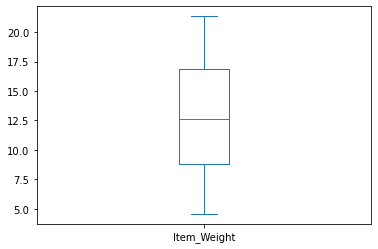

In [7]:
data["Item_Weight"].plot.box()

In [8]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
data["Item_Weight"].fillna(value=data["Item_Weight"].mean(),inplace=True)

In [10]:
data["Item_Weight"].mean()

12.857645184136409

In [11]:
#Another variable which contains mising values is outlet_size which is categorical variable
data["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

<AxesSubplot:>

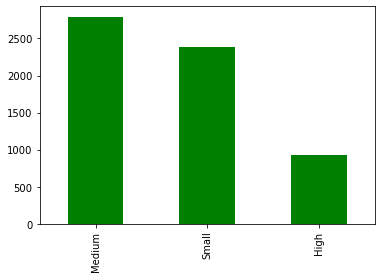

In [12]:
data["Outlet_Size"].value_counts().plot.bar(color='g')

In [13]:
#So we can do mode imputation but one more interesting thing that we can try is balancing our dataset by imputing least 
# or high value in the missing place to give all almost same values counts
data["Outlet_Size"].fillna(data["Outlet_Size"].mode()[0],inplace=True)

In [14]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

<AxesSubplot:>

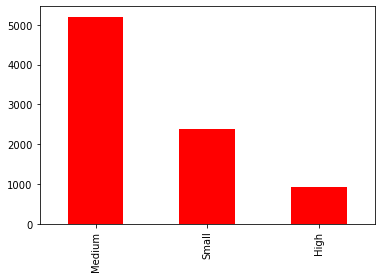

In [15]:
data["Outlet_Size"].value_counts().plot.bar(color='r')

In [16]:
#Dropping features which are not important
#axis 1 for columns and 0 for rows
data.drop(["Item_Identifier","Outlet_Identifier"],axis=1,inplace=True)

In [17]:
data.shape

(8523, 10)

In [18]:
#EDA
data.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Univariate Analysis

### Continious Variable

In [19]:
data["Item_Weight"].describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

<AxesSubplot:ylabel='Frequency'>

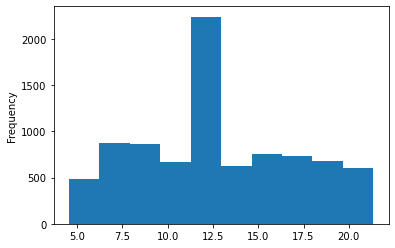

In [20]:
data["Item_Weight"].plot.hist()

C:\Users\Mahesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


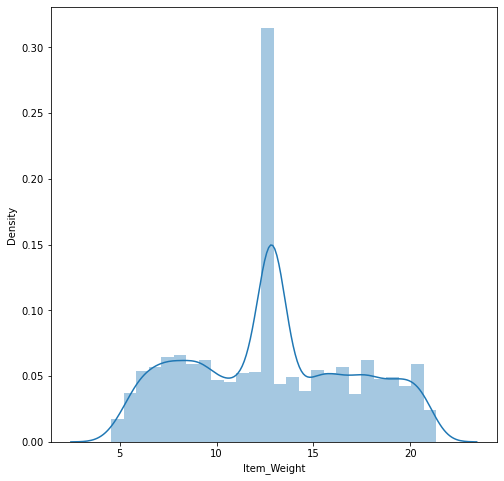

In [21]:
plt.figure(figsize=(8,8))
sns.distplot(data["Item_Weight"])
plt.show()

In [22]:
data["Item_Visibility"].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

<AxesSubplot:ylabel='Frequency'>

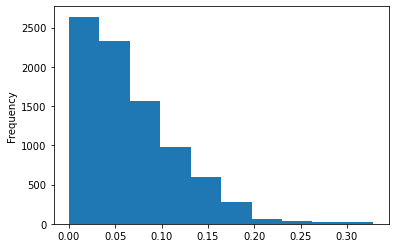

In [23]:
data["Item_Visibility"].plot.hist()

C:\Users\Mahesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


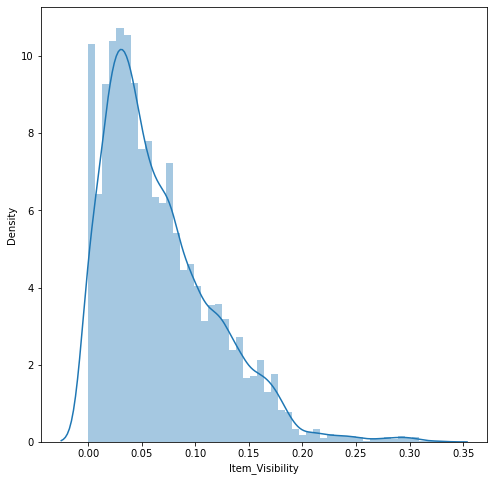

In [24]:
plt.figure(figsize=(8,8))
sns.distplot(data["Item_Visibility"])
plt.show()

In [25]:
data["Item_MRP"].describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

<AxesSubplot:ylabel='Frequency'>

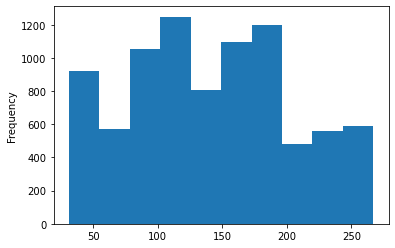

In [26]:
data["Item_MRP"].plot.hist()

C:\Users\Mahesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


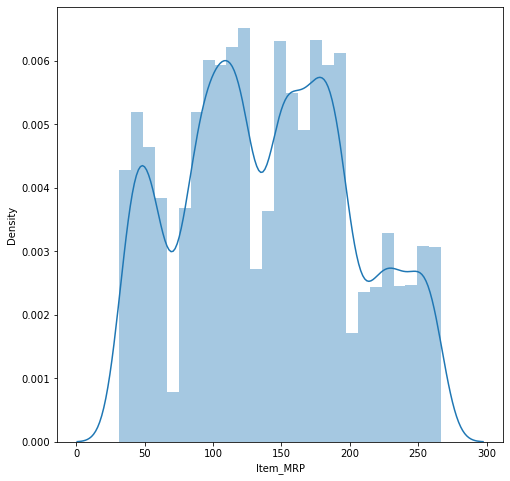

In [27]:
plt.figure(figsize=(8,8))
sns.distplot(data["Item_MRP"])
plt.show()

In [28]:
data["Item_Outlet_Sales"].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:ylabel='Frequency'>

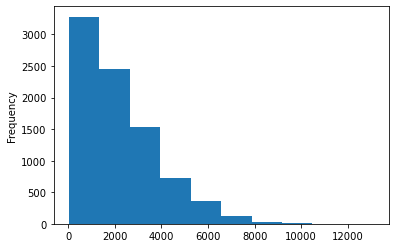

In [29]:
data["Item_Outlet_Sales"].plot.hist()

C:\Users\Mahesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


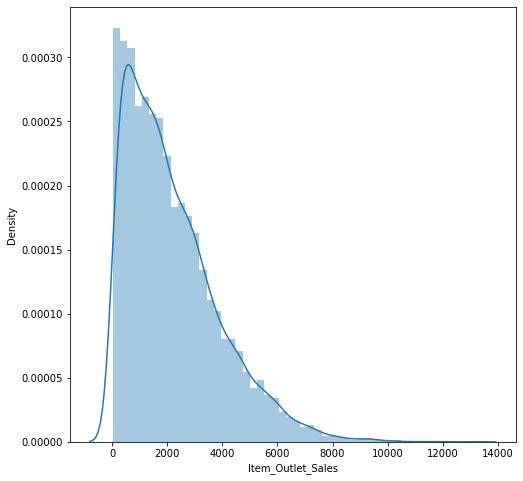

In [30]:
plt.figure(figsize=(8,8))
sns.distplot(data["Item_Outlet_Sales"])
plt.show()

<AxesSubplot:>

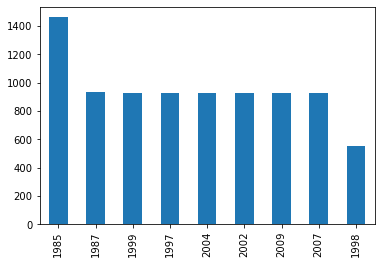

In [31]:
data["Outlet_Establishment_Year"].value_counts().plot.bar()

### Categorical Variables

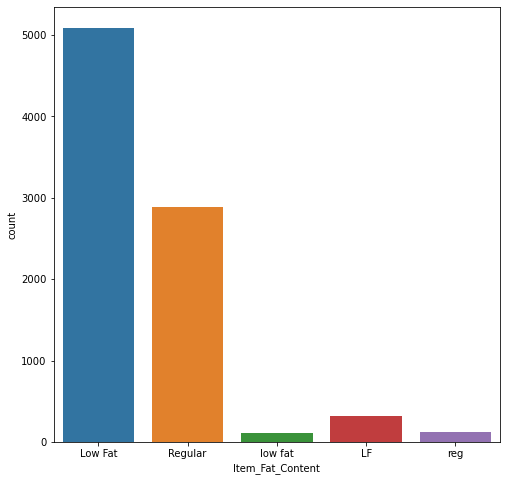

In [32]:
plt.figure(figsize=(8,8))
sns.countplot(x="Item_Fat_Content",data=data)
plt.show()

In [33]:
#Some cleaning and changes required here
data.replace({"Item_Fat_Content" : {"low fat":"Low Fat","LF":"Low Fat","reg":"Regular"}},inplace=True)

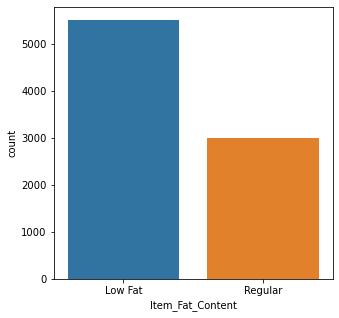

In [34]:
plt.figure(figsize=(5,5))
sns.countplot(x="Item_Fat_Content",data=data)
plt.show()

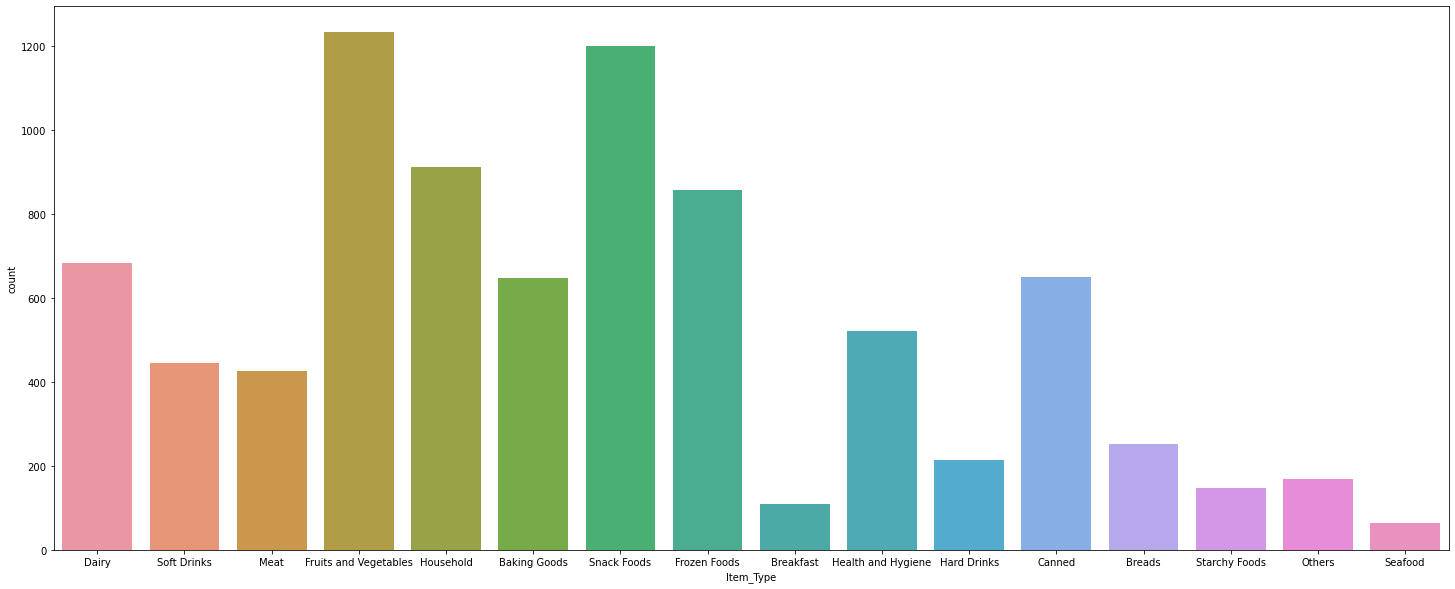

In [35]:
plt.figure(figsize=(25,10))
sns.countplot(x="Item_Type",data=data)
plt.show()

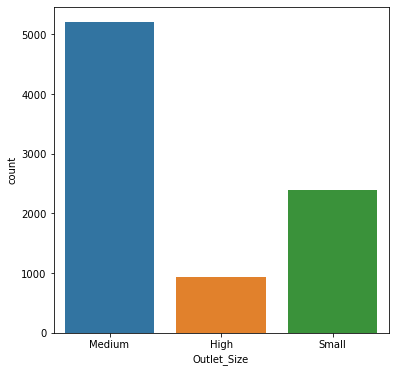

In [36]:
plt.figure(figsize=(6,6))
sns.countplot(x="Outlet_Size",data=data)
plt.show()

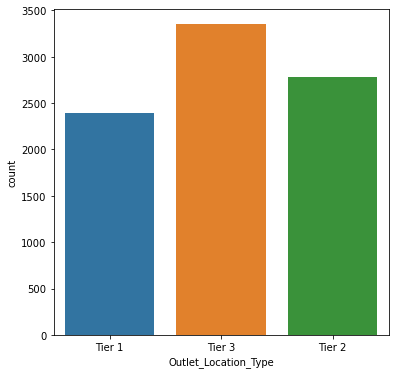

In [37]:
plt.figure(figsize=(6,6))
sns.countplot(x="Outlet_Location_Type",data=data)
plt.show()

In [38]:
#Let's convert all categorical variables into numerical ones
# Label Encoding

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
encoder = LabelEncoder()

In [41]:
data["Item_Fat_Content"] = encoder.fit_transform(data["Item_Fat_Content"])
data["Outlet_Size"] = encoder.fit_transform(data["Outlet_Size"])
data["Item_Type"] = encoder.fit_transform(data["Item_Type"])
data["Outlet_Location_Type"] = encoder.fit_transform(data["Outlet_Location_Type"])
data["Outlet_Type"] = encoder.fit_transform(data["Outlet_Type"])

In [42]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,1987,0,2,1,994.7052


In [43]:
data.shape

(8523, 10)

In [44]:
#Seperate independent and dependent variable
X = data.drop(columns="Item_Outlet_Sales",axis=1)
Y = data["Item_Outlet_Sales"]

In [45]:
# Split train and validation data
from sklearn.model_selection import train_test_split

In [46]:
x_train,x_valid,y_train,y_valid = train_test_split(X,Y,test_size=0.15,random_state=11)

In [47]:
x_train.shape

(7244, 9)

In [48]:
y_train.shape

(7244,)

In [49]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [50]:
LR = LinearRegression()
DT = DecisionTreeRegressor()
RF = RandomForestRegressor()
GB = GradientBoostingRegressor()

In [51]:
from sklearn.metrics import r2_score

In [52]:
def result(model,x_train,x_valid,y_train,y_valid):
    print("ML model is: ",model)
    model.fit(x_train,y_train)
    pred_train = model.predict(x_train)
    print("R^2 value for training data is: ",r2_score(y_train,pred_train))
    
    pred_valid = model.predict(x_valid)
    print("R^2 value for validation data is: ",r2_score(y_valid,pred_valid))

In [53]:
result(LR,x_train,x_valid,y_train,y_valid)

ML model is:  LinearRegression()
R^2 value for training data is:  0.5147873201602189
R^2 value for validation data is:  0.47047604015756195


In [54]:
result(DT,x_train,x_valid,y_train,y_valid)

ML model is:  DecisionTreeRegressor()
R^2 value for training data is:  1.0
R^2 value for validation data is:  0.1856205594306264


In [55]:
result(RF,x_train,x_valid,y_train,y_valid)

ML model is:  RandomForestRegressor()
R^2 value for training data is:  0.9384396999201629
R^2 value for validation data is:  0.5324912896499921


In [56]:
result(GB,x_train,x_valid,y_train,y_valid)

ML model is:  GradientBoostingRegressor()
R^2 value for training data is:  0.6355770332725439
R^2 value for validation data is:  0.5711752286885502


So I tried both Label encoder as well as one hot encoder but results are almost same. So let's try hyperparameter tuning now